In [5]:
from IPython.display import display, Math

# Display the introductory text
display(Math(r'\text{Given input features } ( x_1, x_2, \ldots, x_n ) \text{ and corresponding weights } ( w_1, w_2, \ldots, w_n ), \text{ the perceptron output } ( y ) \text{ is calculated as follows:}'))

# Display the Perceptron equation
display(Math(r'''
y = \begin{cases} 
1 & \text{if } \sum_{i=1}^{n} w_i x_i + b > 0 \\
0 & \text{otherwise}
\end{cases}
'''))

# Display the concluding text
display(Math(r'\text{where } b \text{ is the bias term.}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [6]:
from IPython.display import display, Math

# Display the introductory text
display(Math(r'\text{The Perceptron training algorithm is as follows:}'))

# Display the training algorithm steps
display(Math(r'''
\begin{aligned}
& \text{1. Initialize the weights } ( w_1, w_2, \ldots, w_n ) \text{ and bias } b \text{ to small random values.} \\
& \text{2. For each training sample } ( x_1, x_2, \ldots, x_n ) \text{ with target output } t: \\
& \ \ \ \ \text{a. Calculate the output } y \text{ using the Perceptron equation:} \\
& \ \ \ \ \ \ \ \ y = \begin{cases} 
1 & \text{if } \sum_{i=1}^{n} w_i x_i + b > 0 \\
0 & \text{otherwise}
\end{cases} \\
& \ \ \ \ \text{b. Update the weights and bias:} \\
& \ \ \ \ \ \ \ \ w_i \leftarrow w_i + \eta (t - y) x_i \text{ for each } i \\
& \ \ \ \ \ \ \ \ b \leftarrow b + \eta (t - y) \\
& \text{3. Repeat steps 2-4 for a fixed number of iterations or until convergence.}
\end{aligned}
'''))

# Display the concluding text
display(Math(r'\text{where } \eta \text{ is the learning rate.}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

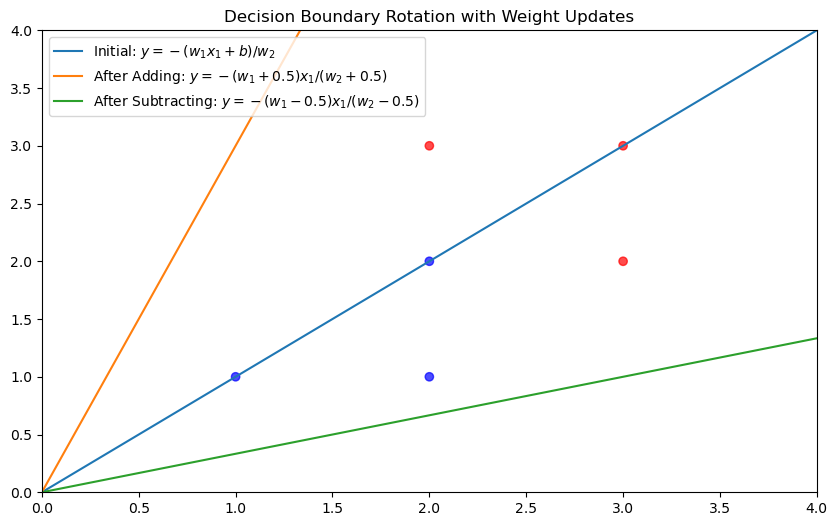

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Generate some linearly separable data
np.random.seed(0)
X = np.array([[2, 3], [1, 1], [2, 1], [3, 2], [2, 2], [3, 3]])
y = np.array([1, 0, 0, 1, 0, 1])

# Initialize weights and bias
w = np.array([1, -1])
b = 0

# Function to plot the decision boundary
def plot_decision_boundary(X, y, w, b, label):
    x1 = np.linspace(0, 4, 100)
    x2 = -(w[0] * x1 + b) / w[1]
    plt.plot(x1, x2, label=label)

# Plot the data points
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)

# Initial decision boundary
plot_decision_boundary(X, y, w, b, 'Initial: $y = -(w_1 x_1 + b) / w_2$')

# Add values to weights
w_add = w + np.array([0.5, 0.5])
plot_decision_boundary(X, y, w_add, b, 'After Adding: $y = -(w_1 + 0.5)x_1 / (w_2 + 0.5)$')

# Subtract values from weights
w_subtract = w - np.array([0.5, 0.5])
plot_decision_boundary(X, y, w_subtract, b, 'After Subtracting: $y = -(w_1 - 0.5)x_1 / (w_2 - 0.5)$')

# Add legend and labels
plt.title('Decision Boundary Rotation with Weight Updates')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.legend()
plt.show()

In [8]:
import pandas as pd # data manipulation
import seaborn as sns # data visualization
import numpy as np 

In [9]:
data=pd.read_csv('placement.csv')
data.head()

,cgpa,resume_score,placed
0,8.14,6.52,1
1,6.17,5.17,0
2,8.27,8.86,1
3,6.88,7.27,1
4,7.52,7.30,1


In [10]:
data.shape
# here shape is object of pandas.core.series.Series class


(100, 3)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


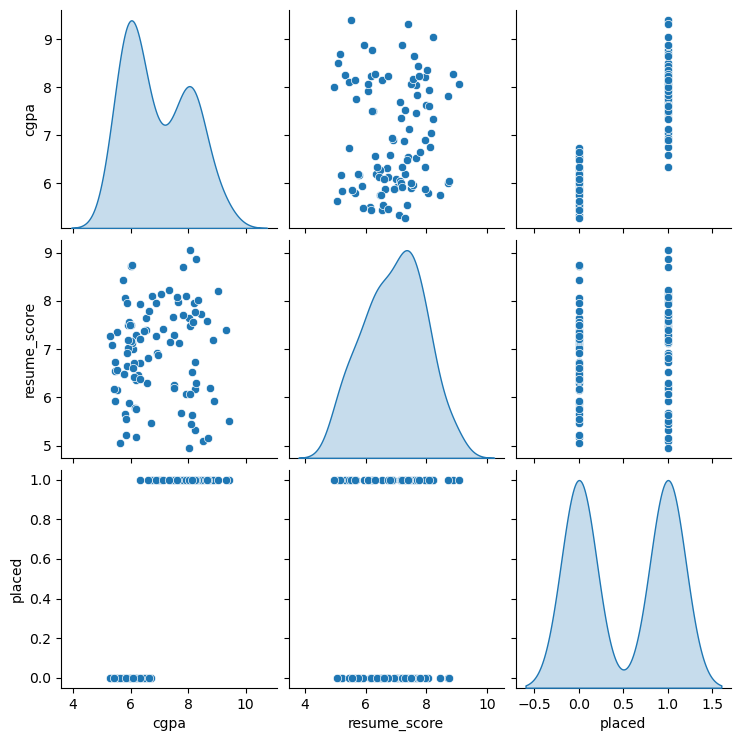

In [11]:
sns.pairplot(data,diag_kind='kde')  

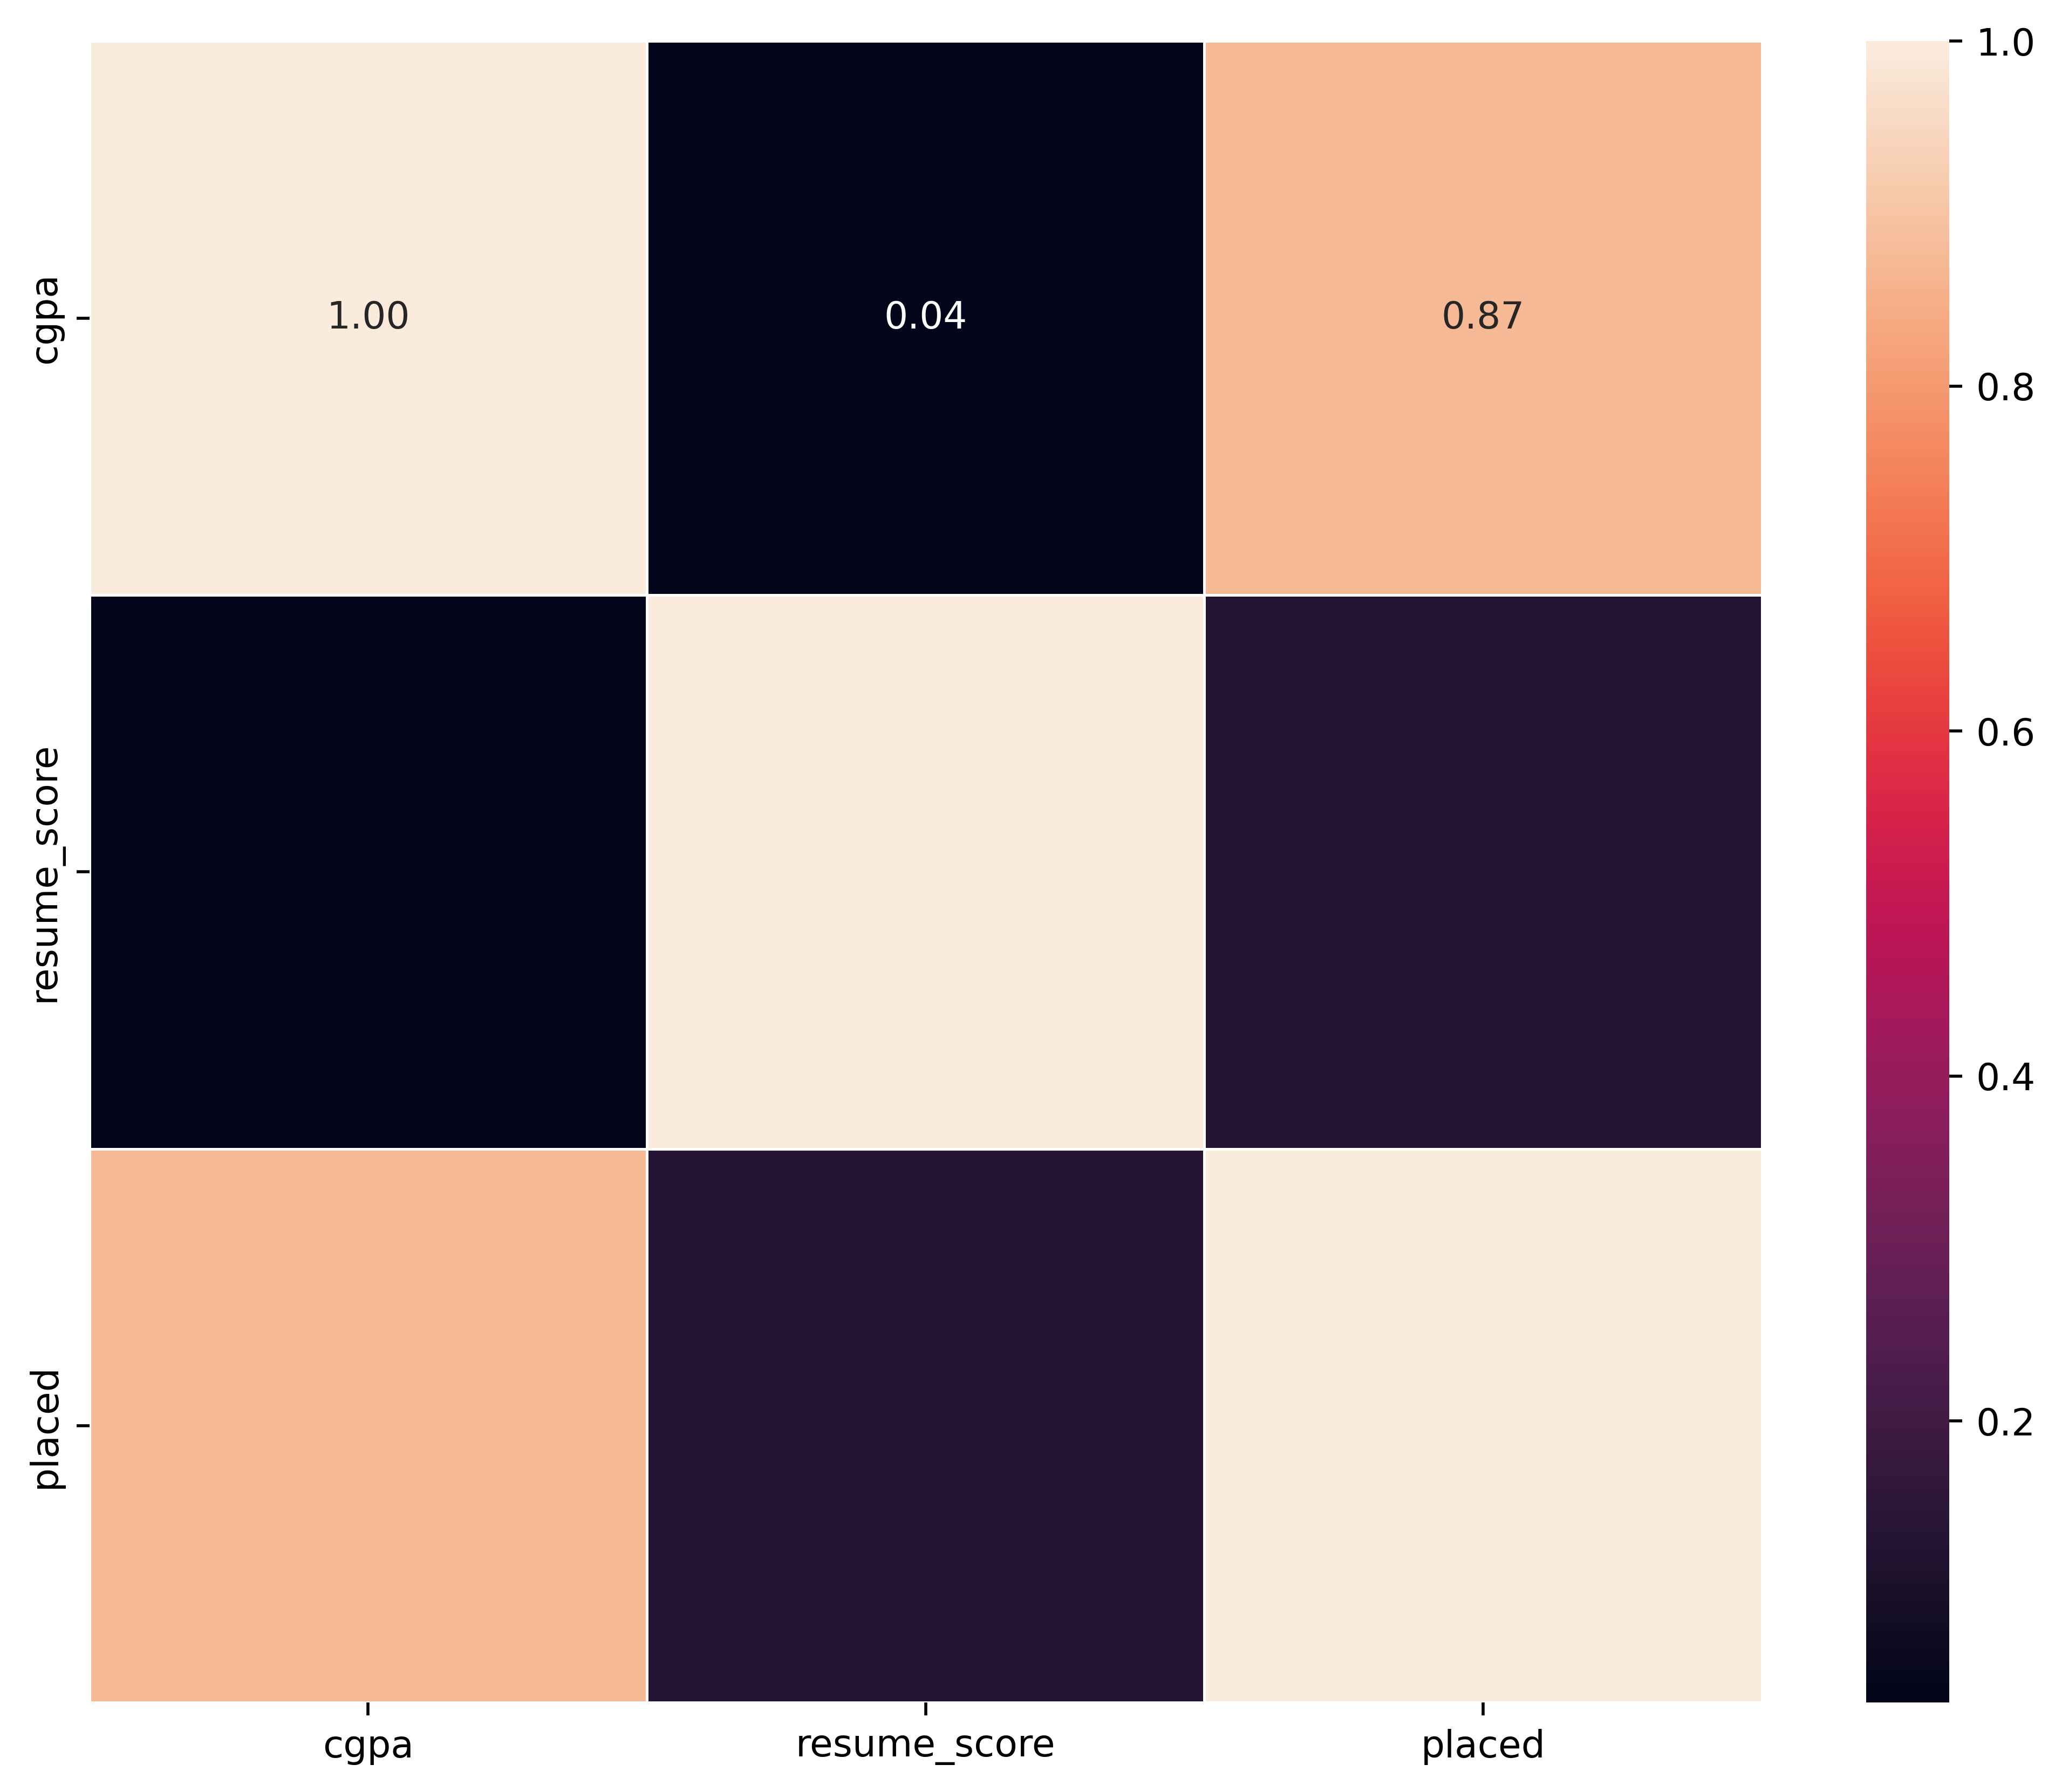

In [12]:
plt.figure(figsize=(10, 8), dpi=500)
sns.heatmap(data.corr(), annot=True, fmt=".2f", linewidths=.5)
plt.show()


<Axes: xlabel='cgpa', ylabel='resume_score'>

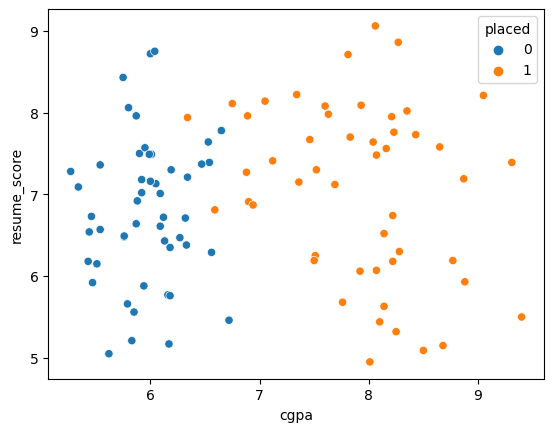

In [13]:
sns.scatterplot(x='cgpa',y='resume_score',data=data,hue='placed')

In [14]:
y = data['placed']
x = data[['resume_score', 'cgpa']]
x[:5]

,resume_score,cgpa
0,6.52,8.14
1,5.17,6.17
2,8.86,8.27
3,7.27,6.88
4,7.30,7.52


In [15]:
from sklearn.linear_model import Perceptron
p = Perceptron()

In [16]:
p.fit(x,y)

Perceptron()

In [17]:
p.coef_

array([[-36.  ,  40.26]])

In [18]:
p.intercept_

array([-25.])

In [19]:
from mlxtend.plotting import plot_decision_regions

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


<Axes: >

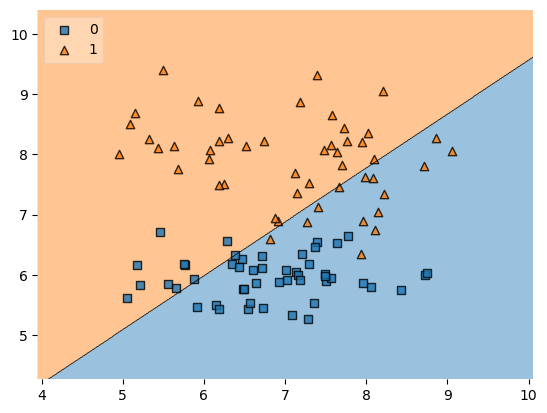

In [20]:
plot_decision_regions(x.values, y.values, clf=p, legend=2)

### Same thing without using inbuild funtion

In [21]:
class CustomPerceptron:
    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._activation_function(linear_output)

                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update
        return self.weights,self.bias

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._activation_function(linear_output)
        return y_predicted

    def _activation_function(self, x):
        return np.where(x > 0, 1, 0)

# Initialize and train the custom perceptron
custom_perceptron = CustomPerceptron(learning_rate=0.01, n_iters=1000)
coef_,intercept_ =custom_perceptron.fit(x.values, y.values)

# Predict using the custom perceptron
predictions = custom_perceptron.predict(x.values)
print(predictions)

[1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1
 1 0 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0
 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 1 0 1 0 1 0]


In [22]:
intercept_,coef_

(-7.089999999999893, array([-0.0196,  0.9594]))

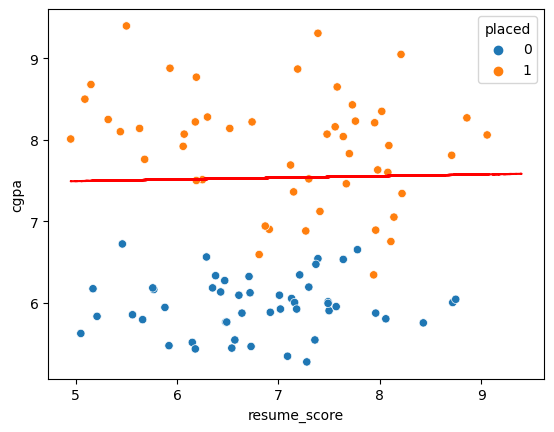

In [23]:
import matplotlib.pyplot as plt

sns.scatterplot(x='resume_score', y='cgpa', hue='placed', data=data)

weights = coef_
bias = intercept_



y_values = -(weights[0] * x.values + bias) / weights[1]

# Plot the decision boundary line
plt.plot(x.values,-(weights[0] * x.values + bias) / weights[1] , color='red', linestyle='--', label='Decision Boundary')


plt.show()

### Another Way

In [24]:
def step(z):
    return 1 if z>0 else 0


In [25]:
def perceptron(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]
        


In [26]:
intercept_,coef_ = perceptron(x.values,y.values)

In [27]:
print(coef_)
print(intercept_)

[-4.065  4.501]
-2.9000000000000012


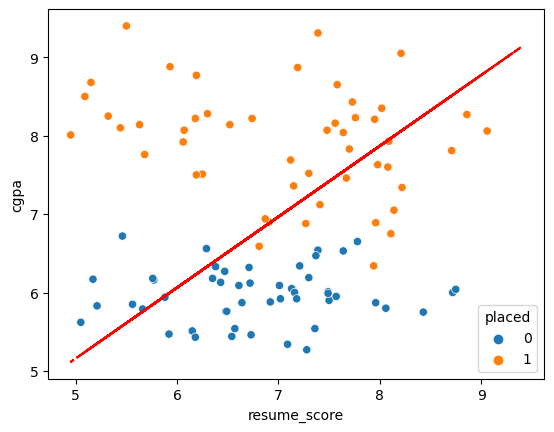

In [28]:
sns.scatterplot(x='resume_score', y='cgpa', hue='placed', data=data)

weights = coef_
bias = intercept_
y_values = -(weights[0] * x.values + bias) / weights[1]

# Plot the decision boundary line
plt.plot(x.values,-(weights[0] * x.values + bias) / weights[1] , color='red', linestyle='--', label='Decision Boundary')


plt.show()